In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Tải dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tiền xử lý
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

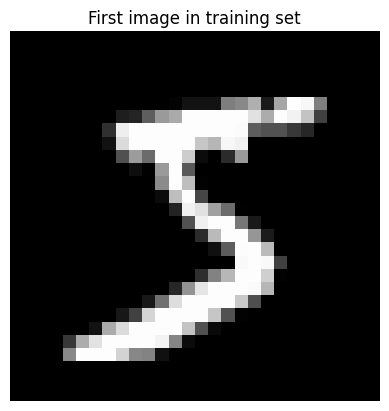

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title('First image in training set')
plt.axis('off')
plt.show()

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # chống overflow
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [3]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Khởi tạo trọng số và bias
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, x):
        self.x = x
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, y_true):
        m = y_true.shape[0]
        dz2 = self.a2 - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(self.x.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Cập nhật
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, x_train, y_train, x_test, y_test, epochs=20):
        for epoch in range(epochs):
            y_pred = self.forward(x_train)
            loss = cross_entropy_loss(y_train, y_pred)
            self.backward(y_train)

            if epoch % 1 == 0:
                test_pred = self.forward(x_test)
                acc = accuracy(y_test, test_pred)
                print(f"Epoch {epoch+1:02d}: Loss = {loss:.4f}, Test Accuracy = {acc:.4f}")

In [4]:
# Khởi tạo và huấn luyện mạng
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.3)
nn.train(x_train, y_train, x_test, y_test, epochs=400)

Epoch 01: Loss = 2.3037, Test Accuracy = 0.2115
Epoch 02: Loss = 2.3001, Test Accuracy = 0.3165
Epoch 03: Loss = 2.2966, Test Accuracy = 0.4191
Epoch 04: Loss = 2.2927, Test Accuracy = 0.4952
Epoch 05: Loss = 2.2882, Test Accuracy = 0.5400
Epoch 06: Loss = 2.2828, Test Accuracy = 0.5657
Epoch 07: Loss = 2.2762, Test Accuracy = 0.5835
Epoch 08: Loss = 2.2681, Test Accuracy = 0.5925
Epoch 09: Loss = 2.2581, Test Accuracy = 0.5979
Epoch 10: Loss = 2.2457, Test Accuracy = 0.6018
Epoch 11: Loss = 2.2304, Test Accuracy = 0.6025
Epoch 12: Loss = 2.2113, Test Accuracy = 0.6019
Epoch 13: Loss = 2.1879, Test Accuracy = 0.6041
Epoch 14: Loss = 2.1594, Test Accuracy = 0.6054
Epoch 15: Loss = 2.1248, Test Accuracy = 0.6111
Epoch 16: Loss = 2.0836, Test Accuracy = 0.6192
Epoch 17: Loss = 2.0351, Test Accuracy = 0.6310
Epoch 18: Loss = 1.9792, Test Accuracy = 0.6416
Epoch 19: Loss = 1.9160, Test Accuracy = 0.6561
Epoch 20: Loss = 1.8462, Test Accuracy = 0.6702
Epoch 21: Loss = 1.7711, Test Accuracy =

In [5]:
nn_info = {"weights": [nn.W1.tolist(), nn.W2.tolist()],
           "biases": [nn.b1.tolist(), nn.b2.tolist()],
           "learning_rate": nn.lr}

In [7]:
import json
# Lưu thông tin mạng vào file JSON
with open('nn_info.json', 'w') as f:
    json.dump(nn_info, f, indent=4)